# Lab 6 - Part A - Computing ACF

A test to calculate the autocorrelation function in python.

The equation for estimating autoacrrelation that we would like to use is taken from http://en.wikipedia.org/wiki/Autocorrelation, section Estimation.

Unfortunately, numpy and Pandas don't have this function built in, so we have to write the code ourselves. The code below creates a synethic dataset and computes the autocorrelation function (ACF).

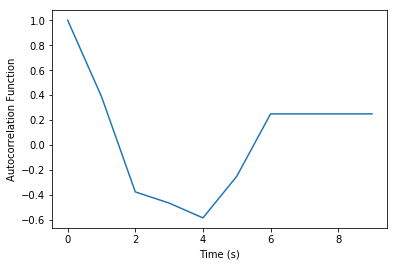

In [1]:
#! /usr/bin/env python

import matplotlib.pyplot as plt
import numpy

# calculates autocorrelation function of a time series
# uses a top hot function as the input time series
# and plots the autocorrelation function which will be
# a triangle function
#
# https://en.wikipedia.org/wiki/Autocorrelation#Estimation

# create an m x n array
m = 1
n = 10
x = numpy.zeros(shape=(m,n))

# calculate the autocorrelation for each m-th row
acorrs = []
for row in x:

    # make each m-th row a top hat function
    row[4:6] = 1

    # subtract the mean of the time series
    y = row - row.mean()

    # autocorrelate
    acorr = numpy.correlate(y, y, mode="full")

    # take only the second half of the time series because
    # correlate returns the autocorrelation from a negative time
    # and not zero
    acorr = acorr[acorr.size/2:]

    # normalize by the variance
    acorr /= ( row.var() * numpy.arange(row.size, 0, -1) )

    # add to list of autocorrelations time series
    acorrs.append(acorr)

# get sample times for plotting
t = numpy.arange(0, n, 1)

# plot
for acorr in acorrs:
    plt.plot(t, acorr)
    
plt.ylabel("Autocorrelation Function")
plt.xlabel("Time (s)")
plt.show()